### 1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema (probar al menos 2 diferentes)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [28]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [6]:
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])
df = df[(df[64] == 1) | (df[64] ==9)]
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9.0
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1.0
19,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9.0
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.0,0.0,5.0,14.0,11.0,8.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,15.0,12.0,5.0,0.0,0.0,9.0
1774,0.0,0.0,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,10.0,4.0,0.0,0.0,1.0
1786,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0


In [7]:
X = np.array(df.iloc[:,:-1])
X

array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0., 11., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [9]:
y = np.array(df.iloc[:,-1])
y

array([1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9., 1., 1.,
       1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9., 9., 9.,
       9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1., 9., 9.,
       1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9., 1., 1.,
       1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9., 9., 9.,
       9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1., 9., 9.,
       9., 1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9., 1.,
       1., 1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9., 9.,
       9., 9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1., 9.,
       9., 9., 1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9.,
       1., 1., 1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9.,
       9., 9., 9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1.,
       9., 9., 9., 1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1.,
       9., 1., 1., 1., 9.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [12]:
X_train.shape

(289, 64)

In [16]:
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
logisticRegr.score(X_train, y_train)

1.0

In [19]:
logisticRegr.score(X_test, y_test)

1.0

In [21]:
score = logisticRegr.score(X_test, y_test)
print(score * 100, "%")

100.0 %


In [24]:
y_pred = logisticRegr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[35  0]
 [ 0 38]]


Text(0.5, 1.0, 'Accuracy Score: 1.0')

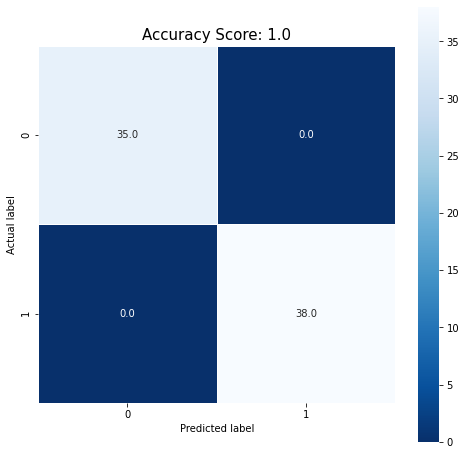

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

### The result makes sense being 100%, as the results between 1 and 9 were not mixed on the original attempt using all of the digits, meaning that the model can accuratly determine the different between 1 and 9.